# CS5242 HW1: Get started with PyTorch

PyTorch is an open source machine learning framework with 58k stars on the [github](https://github.com/pytorch/pytorch). In this code tutorial we will learn the basic of PyTorch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

## Section 1: Environmental Setup

First, we need to install the PyTorch and check the pytorch version.

In [2]:
import torch
torch.__version__

'1.12.1+cu113'

Here are some routines for importing and setting up torch.

In [3]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

The best referrence for pytorch is its [document](https://pytorch.org/docs/stable/index.html). PyTorch is well-known for a good community.

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [4]:
!nvidia-smi

Sun Aug 28 15:25:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Here, you can see the memory and memory usage of the applied GPU. For my case, the applied one is a Tesla T4. The GPU applied may be different, but it is ok for our experiments.

Now let's create tensor, which is the basic element in PyTorch.

In [5]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


In the following sections, you need to fill in the code to complete the function and answer the questions.

The question will be in the form:

===> Question: What is deep learning?  
===> Answer:  
Your answer here.

The code completion will be in the form:

In [7]:
# === Complete the code

# === Complete the code

Grades: HW1 is composed of two parts and 10 points in all. Each part contains 5 points.  

The homework on PDF consists of 10 questions, each is worth 0.5 points. You can write the answer by LaTeX, word or handwritting (take photo) and submit to the system.  

The homework here on notebook (colab) consists of several code completions and 5 questions. There are 18 units for code completions (one unit for one line, which is also a hint). And there are 12 units for questions. 30 units in total will share the 5 points. For submission, you need to submit the notebook with output.

15% off per day late (17:01 is the start of one day)​

0 score if you submit it 7 days after the deadline​

Deadline for homework on PDF: 17:00, 22 Aug  
Deadline for homework on Notebook: 17:00, 30 Aug

## Section 2: Basic Usage

In [16]:
# 2.1: Use autograd to calculate gradients

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.tensor(4.)

# Build a computational graph.
pred = w * x + b
L = (pred - y)**2
# Compute gradients.
# === Complete the code (1')
L.backward()
# === Complete the code

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)

tensor(4.)
tensor(2.)
tensor(2.)


===> Question 1: Compute the above gradients on your own and show the result from PyTorch is correct. (2')  
===> Answer:


```
dL/dx = 2(pred-y)w= 2*1*2 = 4
dL/dw = 2(pred-y)x = 2*1*1 = 2
dL/db = 2(pred-y) = 2*1 = 2
```



In [17]:
# 2.2 update parameters by gradient descent

# we want to update parameters w and b
lr = 0.01

# 1-step gradient descent
# === Complete the code (2')
with torch.no_grad():
  w-=lr*w.grad
  b-=lr*b.grad
# === Complete the code

# current loss
pred = w * x + b
L = (pred - y)**2

print(w)
print(b)
print(L)

tensor(1.9800, requires_grad=True)
tensor(2.9800, requires_grad=True)
tensor(0.9216, grad_fn=<PowBackward0>)


In [18]:
# 2.3 update parameters by optimizer

# Use SGD optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 5-step gradient descent.
for t in range(5):
  pred = w * x + b
  L = (pred - y)**2
  optimizer.zero_grad()
  # === Complete the code (2')
  L.backward()
  optimizer.step()

  # === Complete the code

print(w)
print(b)
print(L)

tensor(1.8914, requires_grad=True)
tensor(2.8914, requires_grad=True)
tensor(0.6648, grad_fn=<PowBackward0>)


===> Question 2: Why do we need `optimizer.zero_grad()`? (1') What happens if we do not `zero_grad` in each step? (1')  
===> Answer: Gradients by default accumulate with each L.backward(). If we do not set `zero_grad` in each step the gradient being used in that step would be an accumulation of current and previous grads. (Ref: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch which also links to the actual source of TORCH.AUTOGRAD)

===> Question 3: What's the meaning of `grad_fn=<PowBackward0>`? (1')  
===> Answer: When creating tensors from leaf node tensors, pytorch automatically builds a dynamic computation graph like b-> (mul) -> pred. Or pred -> (pow) -> L. At the same time, it creates complementary backward function nodes used to calculate gradients during backprop. This is the grad_fn that is used to calculate and propagate the gradients backwards from root to leaf nodes. Since L (the root node from which we called backward) is derived by using power function on another tensore, the grad_fn that is used for it's gradient is PowBackward0.


In [19]:
# 2.4 create tensors

shape = (2, 3)

# create an empty tensor
x = torch.empty(shape)
print(x)

# create a full-zero tensor with type long
# === Complete the code (1')
x = torch.zeros(shape, dtype=torch.long)
# === Complete the code
print(x)

# create a a tensor filled with random numbers from 
# a uniform distribution on the interval [0, 1)
# === Complete the code (1')
x = torch.rand(shape)
# === Complete the code
print(x)

# create a tensor filled with random numbers from a standard normal distribution
# === Complete the code (1')
x = torch.normal(0, 1, shape)
# === Complete the code
print(x)

# create a tensor from numpy
x = np.array([[1, 2], [3, 4]])
# === Complete the code (1')
x = torch.tensor(x)
# === Complete the code
print(x)

# convert a tensor to numpy
x = x.numpy()
print(x)

tensor([[1.0024e+12, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [74]:
# 2.5 gradient of matrix and vector

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

# Forward pass.
pred = linear(x)

# Compute loss.
# === Complete the code (1')
loss = criterion(pred, y)
# === Complete the code
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
# === Complete the code (2')
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
# === Complete the code

w:  Parameter containing:
tensor([[ 0.5134, -0.1478,  0.2540],
        [ 0.5144,  0.1910,  0.5772]], requires_grad=True)
b:  Parameter containing:
tensor([0.2995, 0.3589], requires_grad=True)
loss:  1.7526334524154663
dL/dw:  tensor([[ 0.9729,  0.3036, -0.0558],
        [ 1.2226,  0.1844,  0.2392]])
dL/db:  tensor([-0.1352, -0.0362])


===> Question 4: What is the function of the above code? Do a shape check for the gradient computation above. (2')  
===> Answer: The above code creates a single layer neural network of input layer of size 3 and output layer of size 2. It then does a forward pass with random weights and biases and calculates the L2 loss. Then we do a single backward pass with that loss and calculate the gradients.

For nn.Linear, we know from docs that the transformation looks like:

h(x)=xw'+b

Doing a shape check:

dim(h(x)) = dim(y) (input vector - single example) = 1x2
dim(x) = 1x3
dim(b) = dim(y) = 1x2

and from eqn

dim(x)*dim(w')=dim(b)
(1x3) * dim(w') = 1x2
So

dim(w') = 3x2
dim(w) = 2x3

Now, 

dim(L) = 1x1 = scalar
dim(dL/dw) = dim(w) = 2x3 (denominator layout)
dim(dL/db) = dim(b) = 1x2

## Section 3: Linear Regression


In [21]:
# Hyper-parameters
input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.2], [4.1], [5.6], [7.69], [6.3], [4.112], 
                    [9.79], [5.182], [6.59], [3.167], [7.042], 
                    [10.921], [5.268], [7.9], [3.0]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [22]:
def main(learning_rate=0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizertyo
  criterion = nn.MSELoss()

  # Create optimizer
  # Hint: check manual for model.parameters
  # === Complete the code (1')
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  # === Complete the code

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      # === Complete the code (2')
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      # === Complete the code
      
      # Backward and optimize
      # === Complete the code (3')
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # === Complete the code
      
      if (epoch+1) % 5 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # Plot the graph
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()

Epoch [5/60], Loss: 3.5557
Epoch [10/60], Loss: 1.5880
Epoch [15/60], Loss: 0.7714
Epoch [20/60], Loss: 0.4324
Epoch [25/60], Loss: 0.2917
Epoch [30/60], Loss: 0.2333
Epoch [35/60], Loss: 0.2090
Epoch [40/60], Loss: 0.1988
Epoch [45/60], Loss: 0.1946
Epoch [50/60], Loss: 0.1928
Epoch [55/60], Loss: 0.1920
Epoch [60/60], Loss: 0.1916


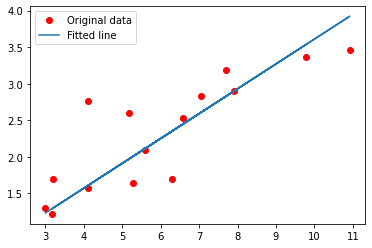

In [23]:
main()

Now let's investigate into how learning rate affects the training process.

===> Question 5: Experiments with different learning rates and num_epochs.   
When will the training diverges? What's your suggested value for the learning rate?   
Justify your answer by running more experiments (leaving the results in the notebook). (5')     
===> Answer: Training diverges at `learning_rate=0.02376`. The fastest convergence seems to happen at `learning_rate=0.003`. 

Additionally, greater number of training epochs seems to give even sub-optimal learning rates a better chance at reaching the global optima - more iterations = closer to optima as long as loss continues to reduce.

Epoch [5/60], Loss: 3.0715
Epoch [10/60], Loss: 0.3189
Epoch [15/60], Loss: 0.1692
Epoch [20/60], Loss: 0.1610
Epoch [25/60], Loss: 0.1605
Epoch [30/60], Loss: 0.1605
Epoch [35/60], Loss: 0.1605
Epoch [40/60], Loss: 0.1605
Epoch [45/60], Loss: 0.1605
Epoch [50/60], Loss: 0.1605
Epoch [55/60], Loss: 0.1605
Epoch [60/60], Loss: 0.1604


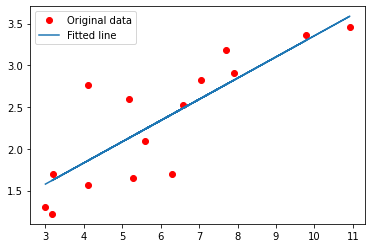

In [71]:
main(learning_rate=0.003, num_epochs = 60) #this seems to consistently yield the smallest loss

Epoch [5/60], Loss: 3.6667
Epoch [10/60], Loss: 0.7191
Epoch [15/60], Loss: 0.2527
Epoch [20/60], Loss: 0.1789
Epoch [25/60], Loss: 0.1672
Epoch [30/60], Loss: 0.1653
Epoch [35/60], Loss: 0.1650
Epoch [40/60], Loss: 0.1649
Epoch [45/60], Loss: 0.1648
Epoch [50/60], Loss: 0.1648
Epoch [55/60], Loss: 0.1648
Epoch [60/60], Loss: 0.1648


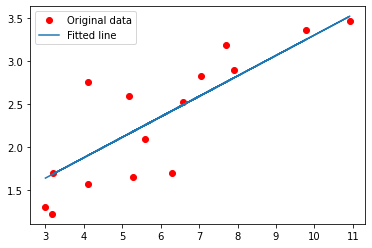

In [72]:
main(learning_rate=0.002, num_epochs = 60) #slightly greater loss in this direction

Epoch [5/60], Loss: 0.4156
Epoch [10/60], Loss: 0.2067
Epoch [15/60], Loss: 0.1869
Epoch [20/60], Loss: 0.1849
Epoch [25/60], Loss: 0.1846
Epoch [30/60], Loss: 0.1844
Epoch [35/60], Loss: 0.1842
Epoch [40/60], Loss: 0.1841
Epoch [45/60], Loss: 0.1839
Epoch [50/60], Loss: 0.1838
Epoch [55/60], Loss: 0.1836
Epoch [60/60], Loss: 0.1834


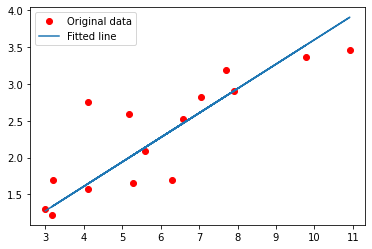

In [28]:
main(learning_rate=0.0025, num_epochs = 60) #still greater loss

Epoch [5/60], Loss: 0.2169
Epoch [10/60], Loss: 0.2145
Epoch [15/60], Loss: 0.2139
Epoch [20/60], Loss: 0.2134
Epoch [25/60], Loss: 0.2130
Epoch [30/60], Loss: 0.2125
Epoch [35/60], Loss: 0.2120
Epoch [40/60], Loss: 0.2115
Epoch [45/60], Loss: 0.2111
Epoch [50/60], Loss: 0.2106
Epoch [55/60], Loss: 0.2102
Epoch [60/60], Loss: 0.2097


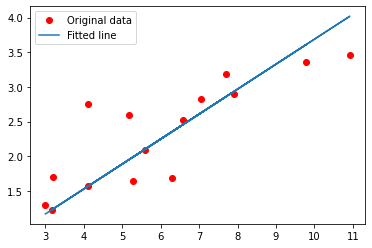

In [29]:
main(learning_rate=0.0035, num_epochs = 60) #greater loss again

Epoch [5/60], Loss: 1.1289
Epoch [10/60], Loss: 0.1771
Epoch [15/60], Loss: 0.1614
Epoch [20/60], Loss: 0.1612
Epoch [25/60], Loss: 0.1611
Epoch [30/60], Loss: 0.1611
Epoch [35/60], Loss: 0.1611
Epoch [40/60], Loss: 0.1611
Epoch [45/60], Loss: 0.1611
Epoch [50/60], Loss: 0.1610
Epoch [55/60], Loss: 0.1610
Epoch [60/60], Loss: 0.1610


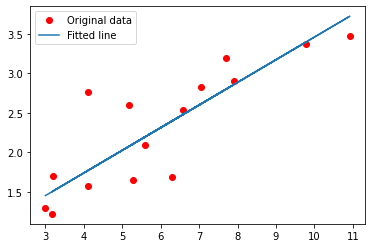

In [30]:
main(learning_rate=0.004, num_epochs = 60) #better, but still greater loss than lr=0.003

Epoch [5/60], Loss: 1.3639
Epoch [10/60], Loss: 0.3180
Epoch [15/60], Loss: 0.3116
Epoch [20/60], Loss: 0.3097
Epoch [25/60], Loss: 0.3078
Epoch [30/60], Loss: 0.3059
Epoch [35/60], Loss: 0.3041
Epoch [40/60], Loss: 0.3022
Epoch [45/60], Loss: 0.3004
Epoch [50/60], Loss: 0.2987
Epoch [55/60], Loss: 0.2969
Epoch [60/60], Loss: 0.2952


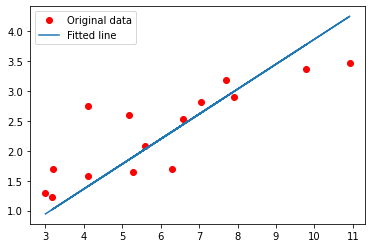

In [31]:
main(learning_rate=0.005, num_epochs = 60)

Epoch [5/60], Loss: 0.3133
Epoch [10/60], Loss: 0.3095
Epoch [15/60], Loss: 0.3057
Epoch [20/60], Loss: 0.3020
Epoch [25/60], Loss: 0.2984
Epoch [30/60], Loss: 0.2950
Epoch [35/60], Loss: 0.2916
Epoch [40/60], Loss: 0.2882
Epoch [45/60], Loss: 0.2850
Epoch [50/60], Loss: 0.2818
Epoch [55/60], Loss: 0.2788
Epoch [60/60], Loss: 0.2758


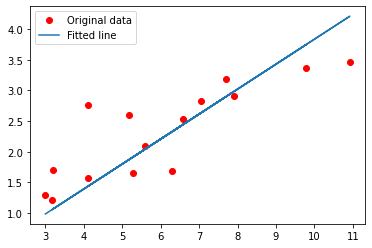

In [32]:
main(learning_rate=0.01, num_epochs = 60)

Epoch [5/60], Loss: 0.1817
Epoch [10/60], Loss: 0.1806
Epoch [15/60], Loss: 0.1798
Epoch [20/60], Loss: 0.1790
Epoch [25/60], Loss: 0.1783
Epoch [30/60], Loss: 0.1776
Epoch [35/60], Loss: 0.1769
Epoch [40/60], Loss: 0.1762
Epoch [45/60], Loss: 0.1756
Epoch [50/60], Loss: 0.1750
Epoch [55/60], Loss: 0.1744
Epoch [60/60], Loss: 0.1738


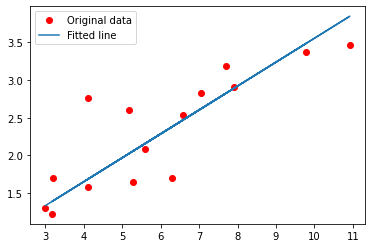

In [34]:
main(learning_rate=0.015, num_epochs = 60)

Epoch [5/60], Loss: 2.3040
Epoch [10/60], Loss: 0.2512
Epoch [15/60], Loss: 0.2031
Epoch [20/60], Loss: 0.2000
Epoch [25/60], Loss: 0.1979
Epoch [30/60], Loss: 0.1960
Epoch [35/60], Loss: 0.1942
Epoch [40/60], Loss: 0.1925
Epoch [45/60], Loss: 0.1908
Epoch [50/60], Loss: 0.1892
Epoch [55/60], Loss: 0.1877
Epoch [60/60], Loss: 0.1863


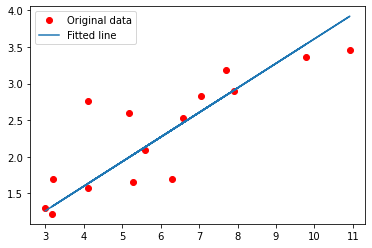

In [35]:
main(learning_rate=0.02, num_epochs = 60)

Epoch [5/60], Loss: 164.5533
Epoch [10/60], Loss: 445.0445
Epoch [15/60], Loss: 1204.4946
Epoch [20/60], Loss: 3260.7383
Epoch [25/60], Loss: 8828.0908
Epoch [30/60], Loss: 23901.8750
Epoch [35/60], Loss: 64714.5508
Epoch [40/60], Loss: 175215.9688
Epoch [45/60], Loss: 474401.0938
Epoch [50/60], Loss: 1284454.1250
Epoch [55/60], Loss: 3477696.2500
Epoch [60/60], Loss: 9415957.0000


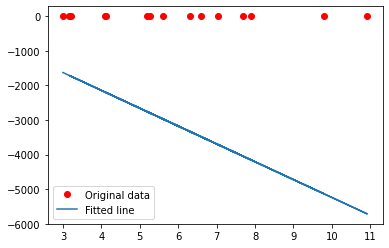

In [41]:
main(learning_rate=0.025, num_epochs = 60) #diverges - let's do bin search to find the inflection point

Epoch [5/60], Loss: 2.3851
Epoch [10/60], Loss: 0.9301
Epoch [15/60], Loss: 0.4518
Epoch [20/60], Loss: 0.2931
Epoch [25/60], Loss: 0.2391
Epoch [30/60], Loss: 0.2194
Epoch [35/60], Loss: 0.2111
Epoch [40/60], Loss: 0.2066
Epoch [45/60], Loss: 0.2034
Epoch [50/60], Loss: 0.2008
Epoch [55/60], Loss: 0.1984
Epoch [60/60], Loss: 0.1962


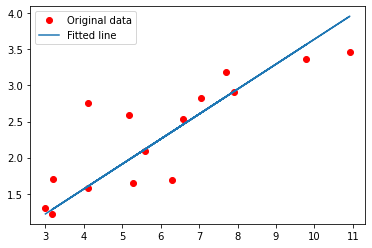

In [37]:
main(learning_rate=0.0225, num_epochs = 60)

Epoch [5/60], Loss: 0.4082
Epoch [10/60], Loss: 0.4069
Epoch [15/60], Loss: 0.4056
Epoch [20/60], Loss: 0.4044
Epoch [25/60], Loss: 0.4031
Epoch [30/60], Loss: 0.4018
Epoch [35/60], Loss: 0.4006
Epoch [40/60], Loss: 0.3994
Epoch [45/60], Loss: 0.3981
Epoch [50/60], Loss: 0.3969
Epoch [55/60], Loss: 0.3957
Epoch [60/60], Loss: 0.3945


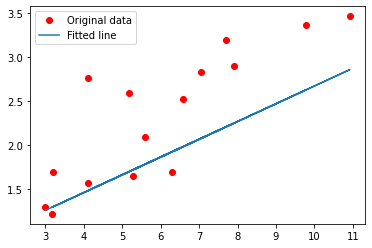

In [38]:
main(learning_rate=0.02375, num_epochs = 60) # still decreasing loss

Epoch [5/60], Loss: 10.3186
Epoch [10/60], Loss: 10.3529
Epoch [15/60], Loss: 10.3874
Epoch [20/60], Loss: 10.4220
Epoch [25/60], Loss: 10.4566
Epoch [30/60], Loss: 10.4914
Epoch [35/60], Loss: 10.5264
Epoch [40/60], Loss: 10.5614
Epoch [45/60], Loss: 10.5966
Epoch [50/60], Loss: 10.6319
Epoch [55/60], Loss: 10.6673
Epoch [60/60], Loss: 10.7029


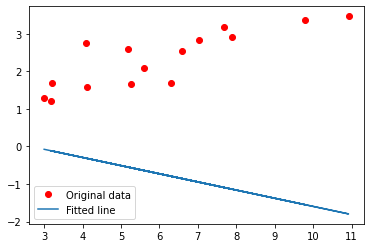

In [45]:
main(learning_rate=0.02376, num_epochs = 60) #loss increases this time with each batch - this seems to be the point of inflection

Epoch [5/100], Loss: 5.7798
Epoch [10/100], Loss: 0.4659
Epoch [15/100], Loss: 0.1767
Epoch [20/100], Loss: 0.1609
Epoch [25/100], Loss: 0.1601
Epoch [30/100], Loss: 0.1600
Epoch [35/100], Loss: 0.1600
Epoch [40/100], Loss: 0.1600
Epoch [45/100], Loss: 0.1600
Epoch [50/100], Loss: 0.1600
Epoch [55/100], Loss: 0.1600
Epoch [60/100], Loss: 0.1600
Epoch [65/100], Loss: 0.1600
Epoch [70/100], Loss: 0.1600
Epoch [75/100], Loss: 0.1600
Epoch [80/100], Loss: 0.1600
Epoch [85/100], Loss: 0.1600
Epoch [90/100], Loss: 0.1599
Epoch [95/100], Loss: 0.1599
Epoch [100/100], Loss: 0.1599


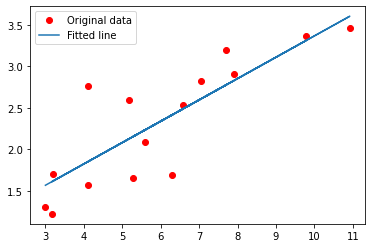

In [56]:
main(learning_rate=0.003, num_epochs = 100) 

Epoch [5/500], Loss: 0.3943
Epoch [10/500], Loss: 0.2602
Epoch [15/500], Loss: 0.2570
Epoch [20/500], Loss: 0.2560
Epoch [25/500], Loss: 0.2550
Epoch [30/500], Loss: 0.2540
Epoch [35/500], Loss: 0.2531
Epoch [40/500], Loss: 0.2521
Epoch [45/500], Loss: 0.2512
Epoch [50/500], Loss: 0.2502
Epoch [55/500], Loss: 0.2493
Epoch [60/500], Loss: 0.2484
Epoch [65/500], Loss: 0.2475
Epoch [70/500], Loss: 0.2466
Epoch [75/500], Loss: 0.2457
Epoch [80/500], Loss: 0.2449
Epoch [85/500], Loss: 0.2440
Epoch [90/500], Loss: 0.2431
Epoch [95/500], Loss: 0.2423
Epoch [100/500], Loss: 0.2415
Epoch [105/500], Loss: 0.2406
Epoch [110/500], Loss: 0.2398
Epoch [115/500], Loss: 0.2390
Epoch [120/500], Loss: 0.2382
Epoch [125/500], Loss: 0.2374
Epoch [130/500], Loss: 0.2366
Epoch [135/500], Loss: 0.2358
Epoch [140/500], Loss: 0.2350
Epoch [145/500], Loss: 0.2343
Epoch [150/500], Loss: 0.2335
Epoch [155/500], Loss: 0.2328
Epoch [160/500], Loss: 0.2320
Epoch [165/500], Loss: 0.2313
Epoch [170/500], Loss: 0.2306


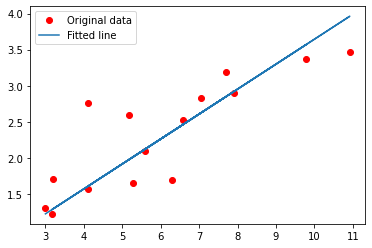

In [59]:
main(learning_rate=0.004, num_epochs = 500) 

Epoch [5/500], Loss: 2.9514
Epoch [10/500], Loss: 0.3610
Epoch [15/500], Loss: 0.2962
Epoch [20/500], Loss: 0.2882
Epoch [25/500], Loss: 0.2818
Epoch [30/500], Loss: 0.2757
Epoch [35/500], Loss: 0.2699
Epoch [40/500], Loss: 0.2645
Epoch [45/500], Loss: 0.2592
Epoch [50/500], Loss: 0.2543
Epoch [55/500], Loss: 0.2496
Epoch [60/500], Loss: 0.2451
Epoch [65/500], Loss: 0.2408
Epoch [70/500], Loss: 0.2368
Epoch [75/500], Loss: 0.2329
Epoch [80/500], Loss: 0.2293
Epoch [85/500], Loss: 0.2258
Epoch [90/500], Loss: 0.2225
Epoch [95/500], Loss: 0.2194
Epoch [100/500], Loss: 0.2164
Epoch [105/500], Loss: 0.2135
Epoch [110/500], Loss: 0.2108
Epoch [115/500], Loss: 0.2083
Epoch [120/500], Loss: 0.2058
Epoch [125/500], Loss: 0.2035
Epoch [130/500], Loss: 0.2013
Epoch [135/500], Loss: 0.1992
Epoch [140/500], Loss: 0.1972
Epoch [145/500], Loss: 0.1954
Epoch [150/500], Loss: 0.1936
Epoch [155/500], Loss: 0.1919
Epoch [160/500], Loss: 0.1902
Epoch [165/500], Loss: 0.1887
Epoch [170/500], Loss: 0.1872


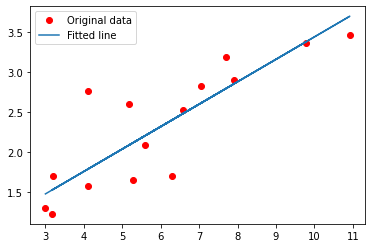

In [66]:
main(learning_rate=0.02, num_epochs = 500) 